<h1> <strong> 1-Dimensional KMeans from Scratch

<i> @description: Built a simple 1-dimensional K Means from scratch (with K = 2), to explore the iterative mechanisms of centroid adjustment.

<i> @created: 22 June 2020 20:59:59pm
    
<i> @author: Manuel Seet

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random

n = 100
lr = 0.5

#here, I generate random gaussian dist data, with discriminable locations
a = np.random.normal(33,5,n) 
b = np.random.normal(40,5,n)
x = np.append(a,b)

label_a = np.array([0]*n)
label_b = np.array([1]*n)
labels = np.append(label_a,label_b)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

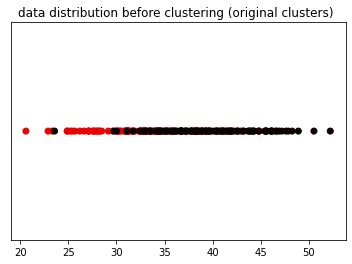

In [84]:
plt.scatter(x, np.zeros_like(x), c = labels,
            cmap="hot_r", vmin=-2)

plt.yticks([])
#plt.legend()
plt.title("data distribution before clustering (original clusters) ")
plt.show()

In [85]:
min = x.min()
max = x.max()
range1 = max - min
min, max, range1

(20.57223140506331, 52.25780030045138, 31.68556889538807)

In [86]:
centA = min + (random()*range1)
centB = min + (random()*range1)
centA, centB

(29.33750013439871, 46.19949083768814)

In [87]:
if centA > centB:
    centA, centB = centB, centA
centA, centB

(29.33750013439871, 46.19949083768814)

In [88]:
dist2A = abs(x - centA)
dist2B = abs(x - centB)
x,dist2A;

In [89]:
newlabel = []


for i in range(len(x)):
    if dist2A[i] < dist2B[i]:
        newlabel.append(0)
    elif dist2A[i] > dist2B[i]:
        newlabel.append(1)


In [90]:
a1 = []
b1 = []

for i in range(len(newlabel)):
    if newlabel[i] == 0:
        a1.append(x[i])
    elif newlabel[i] == 1:
        b1.append(x[i])

centA1 = np.mean(a1)
centB1 = np.mean(b1)

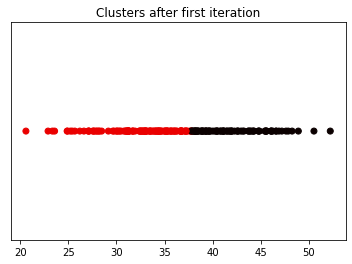

In [91]:
plt.scatter(x, np.zeros_like(x), c = newlabel,
            cmap="hot_r", vmin=-2)

plt.yticks([])
#plt.legend()
plt.title("Clusters after first iteration")
plt.show()

In [92]:

centroidsA = [centA, centA1]
centroidsB = [centB, centB1]

for i in range(4):
    dist2A_00 = abs(x - centA1)
    dist2B_00 = abs(x - centB1)

    newlabel = []
    for i in range(len(x)):
        if dist2A_00[i] < dist2B_00[i]:
            newlabel.append(0)
        elif dist2A_00[i] > dist2B_00[i]:
            newlabel.append(1)

    a1 = []
    b1 = []

    for i in range(len(newlabel)):
        if newlabel[i] == 0:
            a1.append(x[i])
        elif newlabel[i] == 1:
            b1.append(x[i])

    centA_00 = np.mean(a1)
    centB_00 = np.mean(b1)
    
    centroidsA.append(centA_00)
    centroidsB.append(centB_00)

centroids = [centA_00, centB_00]
cent_label = [0, 1]

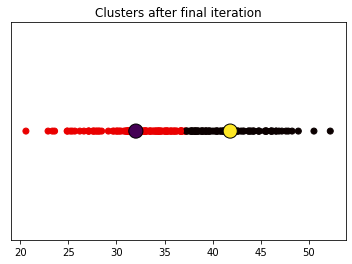

In [93]:
plt.scatter(x, np.zeros_like(x), c = newlabel,
            cmap="hot_r", vmin=-2)
plt.scatter(centroids, np.zeros_like(centroids), c = cent_label,
            edgecolor="k", s = 200)
            
plt.yticks([])
plt.title("Clusters after final iteration")
#plt.legend()
plt.show()

In [94]:
centroidsA, centroidsB, len(a1), len(b1)

([29.33750013439871,
  32.25672887846592,
  32.01650804365316,
  32.01650804365316,
  32.01650804365316,
  32.01650804365316],
 [46.19949083768814,
  42.0938531468384,
  41.84122519920706,
  41.84122519920706,
  41.84122519920706,
  41.84122519920706],
 108,
 92)

Text(0, 0.5, 'Centroid A position')

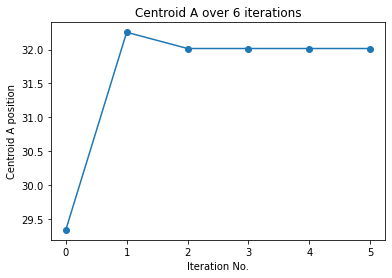

In [95]:
plt.plot(range(len(centroidsA)), centroidsA, "o-")
plt.title("Centroid A over %i iterations" % len(centroidsA))
plt.xlabel("Iteration No.")
plt.ylabel("Centroid A position")

Text(0, 0.5, 'Centroid B position')

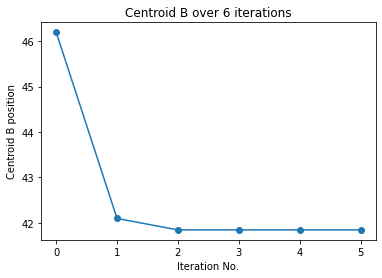

In [96]:
plt.plot(range(len(centroidsB)), centroidsB, "o-")
plt.title("Centroid B over %i iterations" % len(centroidsB))
plt.xlabel("Iteration No.")
plt.ylabel("Centroid B position")

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

report = classification_report(labels, newlabel)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       100
           1       0.72      0.66      0.69       100

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



In [98]:
CM = confusion_matrix(labels, newlabel)
print(CM)

[[74 26]
 [34 66]]
